In [58]:
# For data handling and manipulation
import pandas as pd
import numpy as np

# For data visualization (optional, but useful for understanding data)
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [59]:
# Load the dataset
car_data = pd.read_csv(r'C:\Users\Gladiator\Documents\Untitled Folder\CarPrice_Assignment.csv')  

# Display the first few rows of the data
print(car_data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [60]:
# Check for missing values in the dataset
print(car_data.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [61]:
# You can handle missing values using methods like filling with mean/median or dropping rows:
# Example: car_data.fillna(car_data.mean(), inplace=True)  # Fill missing values with column mean


In [62]:
# Extract manufacturer from CarName and fix typos
car_data['CarManufacturer'] = car_data['CarName'].apply(lambda x: x.split(' ')[0])
car_data['CarManufacturer'] = car_data['CarManufacturer'].replace('vokswagen', 'volkswagen')


In [63]:
# Drop the 'CarName' column as it's not needed anymore
car_data.drop(columns=['CarName'], inplace=True)

In [75]:
# Identify the categorical columns to be encoded
categorical_cols = ['CarManufacturer', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [76]:
# Use OneHotEncoder for the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough') # Pass other numeric columns as is

In [77]:
# Split the data into features and target variable
X = car_data.drop(columns=['car_ID', 'price'])  # Features (exclude price and ID)
y = car_data['price']  # Target variable

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#Preprocess the data (fit the OneHotEncoder and transform the train and test data)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)



In [80]:
# Optional: Feature scaling if needed (for models sensitive to feature magnitude)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_encoded)
# X_test_scaled = scaler.transform(X_test_encoded)

In [81]:
print("Preprocessing complete. The data is now ready for modeling.")

Preprocessing complete. The data is now ready for modeling.


In [82]:
# Import necessary libraries for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



In [83]:
# Initialize a dictionary to store the models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [84]:
# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store the results
    results[model_name] = rmse
    print(f"{model_name} RMSE: {rmse}")


Linear Regression RMSE: 1128621088074.4207
Decision Tree Regressor RMSE: 2872.3689078490215
Random Forest Regressor RMSE: 1813.8210671354655
Gradient Boosting Regressor RMSE: 2388.737531308075
Support Vector Regressor RMSE: 9327.105508253564


In [85]:
# Output the final results
print("\nFinal RMSE results for all models:")
for model_name, rmse in results.items():
    print(f"{model_name}: {rmse}")



Final RMSE results for all models:
Linear Regression: 1128621088074.4207
Decision Tree Regressor: 2872.3689078490215
Random Forest Regressor: 1813.8210671354655
Gradient Boosting Regressor: 2388.737531308075
Support Vector Regressor: 9327.105508253564


In [87]:
# Import necessary evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

# Calculate R-squared, MSE, and MAE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }
    
    # Display the results for all models
print("Model Performance Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")

Model Performance Comparison:

Linear Regression:
R-squared: -16135301271112712.0000
MSE: 1273785560446289154408448.0000
MAE: 176261002685.2739

Decision Tree Regressor:
R-squared: 0.8955
MSE: 8250503.1428
MAE: 1909.0935

Random Forest Regressor:
R-squared: 0.9583
MSE: 3289946.8636
MAE: 1280.4588

Gradient Boosting Regressor:
R-squared: 0.9277
MSE: 5706066.9935
MAE: 1684.1155

Support Vector Regressor:
R-squared: -0.1020
MSE: 86994897.1621
MAE: 5707.1420


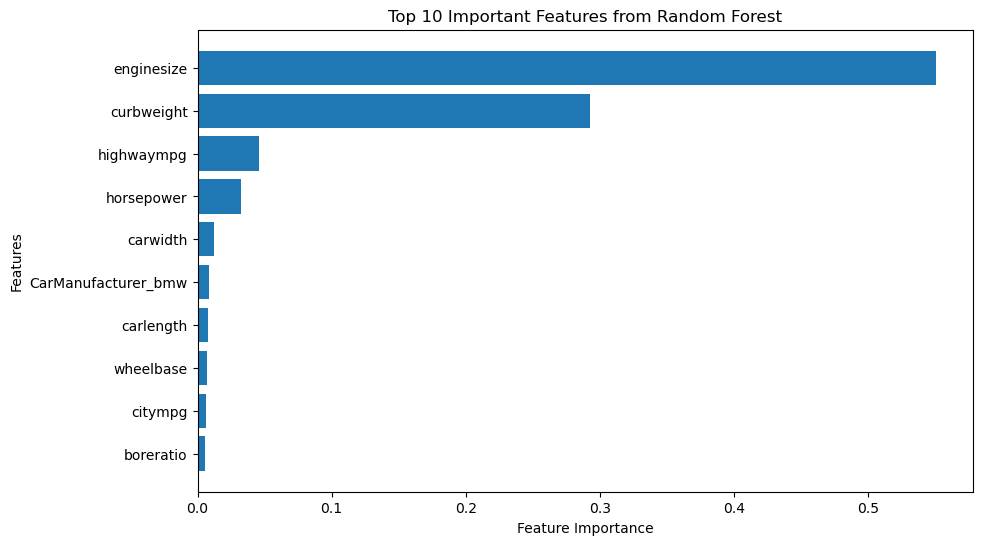

Top 10 Features with Highest Coefficients in Linear Regression:
                       Feature   Coefficient
6        CarManufacturer_dodge -1.276160e+13
13  CarManufacturer_mitsubishi -1.276160e+13
16    CarManufacturer_plymouth -1.276160e+13
23     CarManufacturer_toyouta -1.276160e+13
5    CarManufacturer_chevrolet -1.276160e+13
12     CarManufacturer_mercury -1.276160e+13
22      CarManufacturer_toyota -1.276160e+13
19     CarManufacturer_renault -1.276160e+13
10       CarManufacturer_maxda -1.276160e+13
0       CarManufacturer_Nissan -1.276160e+13

Top 10 Selected Features from RFE:
['CarManufacturer_bmw' 'CarManufacturer_buick' 'CarManufacturer_jaguar'
 'CarManufacturer_subaru' 'enginelocation_front' 'enginelocation_rear'
 'cylindernumber_eight' 'cylindernumber_four' 'fuelsystem_4bbl'
 'boreratio']


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# Step 1: Feature Importance using Random Forest
# Fit the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from the preprocessor (OneHotEncoder)
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_feature_names) + [col for col in X_train.columns if col not in categorical_cols]

# Step 2: Visualize feature importance
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Step 3: Coefficients from Linear Regression
# Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train)

# Get coefficients from the linear regression model
coefficients = linear_model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False, key=abs)

# Display the top 10 features with highest absolute coefficients
print("Top 10 Features with Highest Coefficients in Linear Regression:")
print(coeff_df.head(10))

# Step 4: Recursive Feature Elimination (RFE) with Linear Regression
# Using RFE to select the top features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train_encoded, y_train)

# Get the top selected features
selected_features_rfe = np.array(all_feature_names)[rfe.support_]

print("\nTop 10 Selected Features from RFE:")
print(selected_features_rfe)


In [89]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for Random Forest and Gradient Boosting
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Step 2: Hyperparameter tuning using GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid_rf, 
                              scoring='neg_mean_squared_error', 
                              cv=5, 
                              verbose=1, 
                              n_jobs=-1)

# Fit the GridSearch for Random Forest
grid_search_rf.fit(X_train_encoded, y_train)

# Step 3: Hyperparameter tuning using GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                               param_grid=param_grid_gbr, 
                               scoring='neg_mean_squared_error', 
                               cv=5, 
                               verbose=1, 
                               n_jobs=-1)

# Fit the GridSearch for Gradient Boosting
grid_search_gbr.fit(X_train_encoded, y_train)

# Step 4: Display the best hyperparameters and best scores
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best RMSE score for Random Forest:", (-grid_search_rf.best_score_)**0.5)

print("Best parameters for Gradient Boosting:", grid_search_gbr.best_params_)
print("Best RMSE score for Gradient Boosting:", (-grid_search_gbr.best_score_)**0.5)

# Step 5: Evaluate performance of the tuned models on the test set
best_rf = grid_search_rf.best_estimator_
best_gbr = grid_search_gbr.best_estimator_

# Predict on test data
y_pred_rf = best_rf.predict(X_test_encoded)
y_pred_gbr = best_gbr.predict(X_test_encoded)

# Calculate metrics for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest (Tuned) Performance:")
print(f"R-squared: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

# Calculate metrics for Gradient Boosting
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("\nGradient Boosting (Tuned) Performance:")
print(f"R-squared: {r2_gbr:.4f}")
print(f"MSE: {mse_gbr:.4f}")
print(f"MAE: {mae_gbr:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE score for Random Forest: 2411.2620111214005
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE score for Gradient Boosting: 2356.062494864807

Random Forest (Tuned) Performance:
R-squared: 0.9584
MSE: 3286942.9741
MAE: 1241.6164

Gradient Boosting (Tuned) Performance:
R-squared: 0.9410
MSE: 4658494.2375
MAE: 1547.3237
